
# Project: TMDB 5000 Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

<p>In this project, we will be analyzing data about TMDB movies. This dataset contains information about 5000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

most colums in the dataset are self explonatory but there are certain columns, like ‘genres’ that contain multiple values separated by pipe (|) characters, but it's nothing to worry about we will clean it up.
The orignal data can be found on kaggle <href>https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata</href>.
<p>
<h1> Question(s) for Analysis</h1>

In this project We are interested in exploring and answering the following questions using python libraries such as Pandas, numpy, and matplotlib etc:



<p> Q1: Which movies have the highest budget spend on?

   Q2: What are the top 5 highest profit making movies and the 5 lowest movies?
    
   Q3: What is the relationships between, [Budget & Revenue], and [profit and revenue]?

   Q4: Which year has the highest release of movies?
    
   Q5: Which Month has the highest release movies?
   
   Q6: Which months made the highest average profits?


#### Import Packages

In [63]:
### In this section we will import necessary packages we need to analyze the dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section of the report, we will load, access, and explore the data to understand the characteristics of our data. 

In [64]:
# load the data and read the first two rows and explore the data.

df = pd.read_csv("tmdb_5000_movies.csv")
df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [65]:
# check the data dimensions 
df.shape

(4803, 20)

In [66]:
# let see if we have any duplicates in the data
df. duplicated().sum()

0

In [67]:
# let's inspect the data and get a good understanding of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [68]:
# Now let check our data statics using describe() and the transpose() function.
# Transpose function write rows as columns vice- versa to make the data easy to read.
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
budget,4803.0,2.904504e+07,4.072239e+07,0.0,790000.00000,1.500000e+07,4.000000e+07,3.800000e+08
id,4803.0,5.716548e+04,8.869461e+04,5.0,9014.50000,1.462900e+04,5.861050e+04,4.594880e+05
popularity,4803.0,2.149230e+01,3.181665e+01,0.0,4.66807,1.292159e+01,2.831350e+01,8.755813e+02
revenue,4803.0,8.226064e+07,1.628571e+08,0.0,0.00000,1.917000e+07,9.291719e+07,2.787965e+09
runtime,4801.0,1.068759e+02,2.261193e+01,0.0,94.00000,1.030000e+02,1.180000e+02,3.380000e+02
vote_average,4803.0,6.092172e+00,1.194612e+00,0.0,5.60000,6.200000e+00,6.800000e+00,1.000000e+01
vote_count,4803.0,6.902180e+02,1.234586e+03,0.0,54.00000,2.350000e+02,7.370000e+02,1.375200e+04



### Data Cleaning

###### In this section, we will clean our data, remove uncessary columns, and change data types where applicable by referencing function above.
1. remove uncessary columns that are not useful for answering our questions
2. remove the one duplicate row that we have our data
3. In the data summery statistics, we observe that we have have some 0 values in budget, revenue, and in runtime columns which are not being recorded. we will treat this as MISSING DATA and change it to NANS since we can not calculate the profit of such movies.
4. we will change the release_date to datetime format and fill the missing date values with mode date.

In [69]:
# drop uneccesary Columns that are not useful for us to answer our posted questions [homepage", "tagline", "overview].
df.drop(["homepage", "tagline", "overview"],axis=1, inplace=True)

In [70]:
# confirm the columns are removed
for c in df.columns:
    print(c)

budget
genres
id
keywords
original_language
original_title
popularity
production_companies
production_countries
release_date
revenue
runtime
spoken_languages
status
title
vote_average
vote_count


In [71]:
# remove the duplicate row

df.drop_duplicates(keep = 'first', inplace = True)

In [72]:
# confirm duplicates are dropped
df.duplicated().sum()

0

In [73]:
# replace values of 0 to Nans in the budget, revenue, an the runtime columns, since they will effect our calculations

df['budget'] = df['budget'].replace(0, np.NaN)
df['revenue'] = df['revenue'].replace(0, np.NaN)

In [74]:
# find the mode release date
release_date_mode = df["release_date"].mode()
release_date_mode

0    2006-01-01
Name: release_date, dtype: object

In [75]:
# Fill the missing release_date with the mode date manually
df.fillna({'release_date': "2006-01-01"}, inplace=True)

In [76]:
# Convert the release date to datetime format
df["release_date"] = pd.to_datetime(df["release_date"])

In [77]:
df.dtypes

budget                         float64
genres                          object
id                               int64
keywords                        object
original_language               object
original_title                  object
popularity                     float64
production_companies            object
production_countries            object
release_date            datetime64[ns]
revenue                        float64
runtime                        float64
spoken_languages                object
status                          object
title                           object
vote_average                   float64
vote_count                       int64
dtype: object

In [78]:
# Check if we have any null values in our data
df.isnull().sum()

budget                  1037
genres                     0
id                         0
keywords                   0
original_language          0
original_title             0
popularity                 0
production_companies       0
production_countries       0
release_date               0
revenue                 1427
runtime                    2
spoken_languages           0
status                     0
title                      0
vote_average               0
vote_count                 0
dtype: int64

###### Now that we have cleaned data, we can move the next step EDA and answer our posted questions.

<a id='eda'></a>
## Exploratory Data Analysis

### Question 1. Which top 5 movies have the highes budget?

In [79]:
# in order to answer this question we will need to find out the top 5 movies with the highest budget.
# we probably don't need the whole columns to answer this question let take a subset of our data frame 
# by creates a new data frame
df1 = df[["release_date", "title", "genres", "runtime", "popularity", "budget", "revenue"]]
df1

,release_date,title,genres,runtime,popularity,budget,revenue
0,2009-12-10,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",162.0,150.437577,237000000.0,2.787965e+09
1,2007-05-19,Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",169.0,139.082615,300000000.0,9.610000e+08
2,2015-10-26,Spectre,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",148.0,107.376788,245000000.0,8.806746e+08
3,2012-07-16,The Dark Knight Rises,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",165.0,112.312950,250000000.0,1.084939e+09
4,2012-03-07,John Carter,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",132.0,43.926995,260000000.0,2.841391e+08
...,...,...,...,...,...,...,...
4798,1992-09-04,El Mariachi,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",81.0,14.269792,220000.0,2.040920e+06
4799,2011-12-26,Newlyweds,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",85.0,0.642552,9000.0,NaN
4800,2013-10-13,"Signed, Sealed, Delivered","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",120.0,1.444476,NaN,NaN
4801,2012-05-03,Shanghai Calling,[],98.0,0.857008,NaN,NaN


In [80]:
# Let's get the top 10 movies with the highst budget spent on, sort decending and plot
highest_budget10 = df1.nlargest(n=5, columns="budget")
highest_bufget10 = df1.sort_values("budget", ascending=True)

In [81]:
highest_budget10

,release_date,title,genres,runtime,popularity,budget,revenue
17,2011-05-14,Pirates of the Caribbean: On Stranger Tides,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...",136.0,135.413856,380000000.0,1.045714e+09
1,2007-05-19,Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",169.0,139.082615,300000000.0,9.610000e+08
7,2015-04-22,Avengers: Age of Ultron,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",141.0,134.279229,280000000.0,1.405404e+09
10,2006-06-28,Superman Returns,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",154.0,57.925623,270000000.0,3.910812e+08
4,2012-03-07,John Carter,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",132.0,43.926995,260000000.0,2.841391e+08


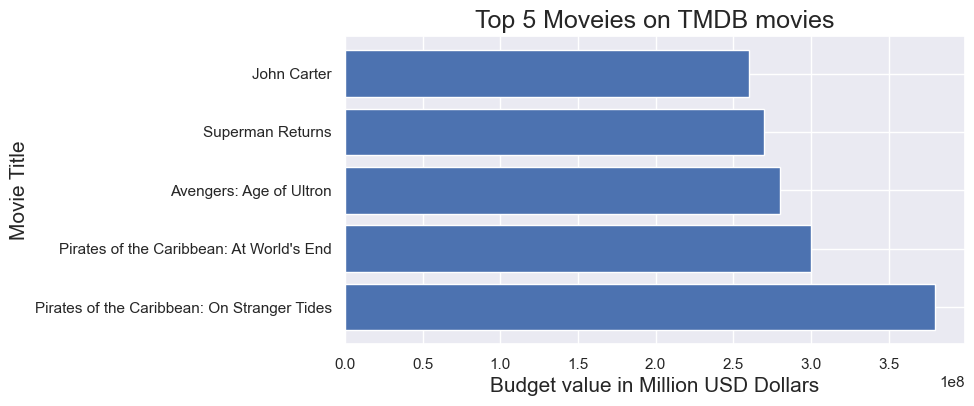

In [82]:
def horizontal_bar():
    plt.figure(figsize=(8,4))
    # bar plot with matplotlib
    plt.barh('title', 'budget',data=highest_budget10)
    plt.xlabel("Budget value in Million USD Dollars", size=15)
    plt.ylabel("Movie Title", size=15)
    plt.title("Top 5 Moveies on TMDB movies", size=18)
horizontal_bar()

### Obeservations

 <p> .Pirates of the Caribbean: On Stranger Tides, <br>
 <p> . At world's end <br>
 <p> . Avengers: Age of Utron <br>
 <p> . Superman returns <br>
 <p> . John Carter are top 5 highes based the budget. <br>

### Question 2 what are the top 5 highest profit making movies and the 5 lowest movies

In [83]:
#calculate Profit for each of the movie
#This line of code is going to create a new column in our data called 'Profit'
df['profit'] = df['revenue'] - df['budget']

In [84]:
df1.columns

Index(['release_date', 'title', 'genres', 'runtime', 'popularity', 'budget',
       'revenue'],
      dtype='object')

In [85]:
# find the top 5 hight profit making movies
top_5 = df.nlargest(5, "profit")

In [86]:
# display the first movie 
top_5.head(1)

,budget,genres,id,keywords,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,profit
0,237000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2.787965e+09,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800,2.550965e+09


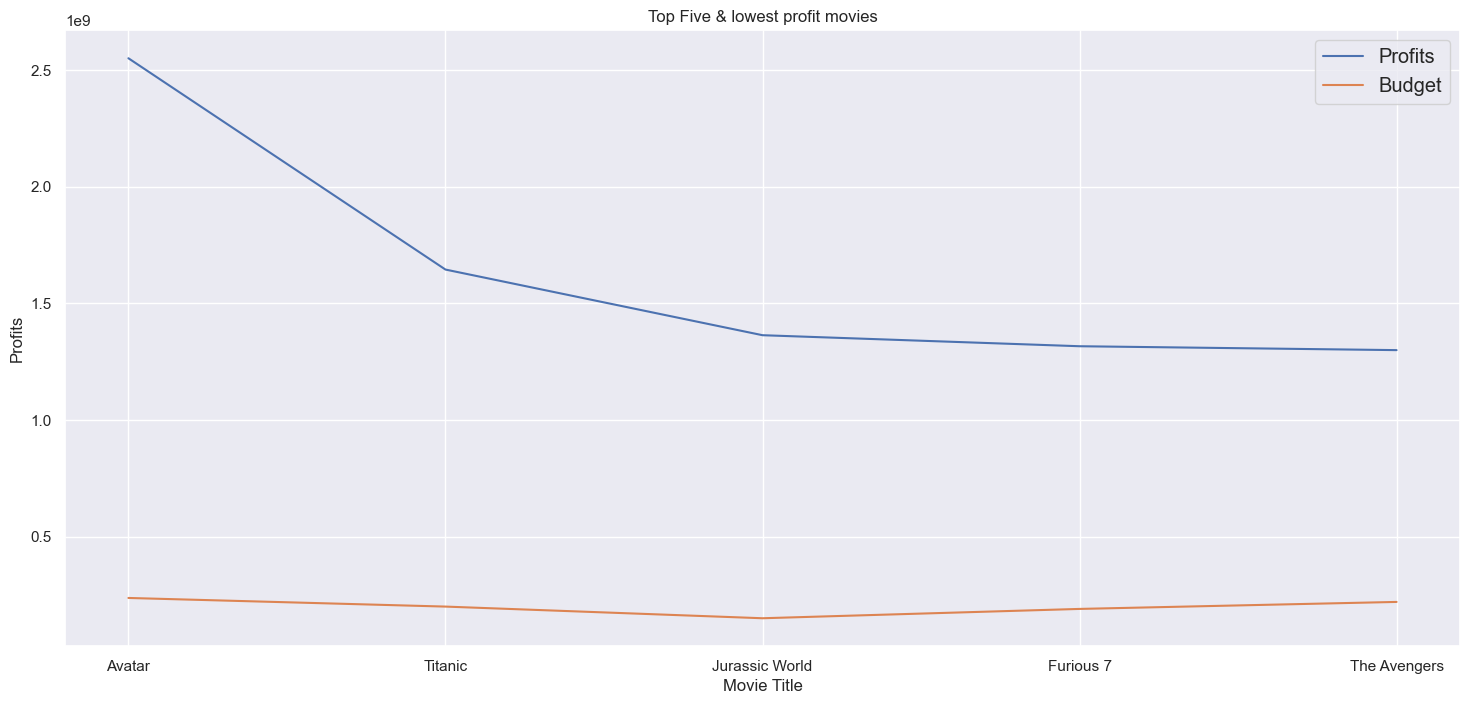

In [87]:
# plot the top 5 profit making movies. 

def plot_top_5_movies():    
    labels = ["Profits", "Budget"]
    plt.figure(figsize=(18, 8))
    plt.plot(top_5["title"], top_5["profit"])
    plt.plot(top_5["title"], top_5["budget"])
    plt.xlabel("Movie Title")
    plt.ylabel("Profits")
    plt.title("Top Five & lowest profit movies")
    plt.legend(labels = labels, fontsize= "large")
plot_top_5_movies()

#### Which movies made the highest profit?

##### Observations
As we see on the Avatar has made the highest profit with profit of 2550965087 USD, followed by the Titanic,Jurassic, Furious, and The Avengers. 

In [88]:
# find the top 5 hight profit making movies
lowest_5 = df.nsmallest(5, "profit")

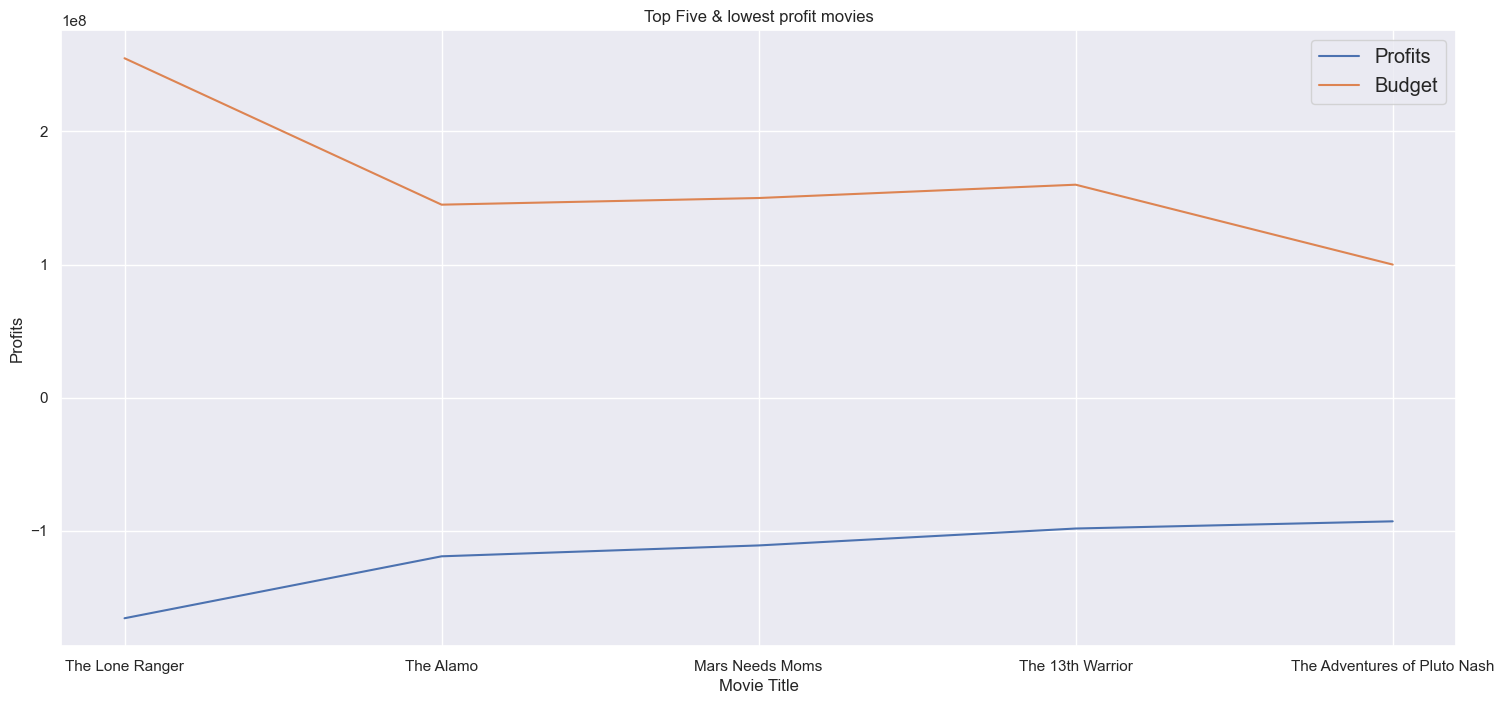

In [89]:
# Let us also plot the movies the 5 movies making the lowest profit.
def plot_lowest_5():    
    labels = ["Profits", "Budget"]
    plt.figure(figsize=(18, 8))
    plt.plot(lowest_5["title"], lowest_5["profit"])
    plt.plot(lowest_5["title"], lowest_5["budget"])
    plt.xlabel("Movie Title")
    plt.ylabel("Profits")
    plt.title("Top Five & lowest profit movies")
    plt.legend(labels = labels, fontsize= "large")
plot_lowest_5()

#### observations

Observing the graph we see that The Lone Ranger is the biggest loser, making the lowest profit of -16571009 USD; followed by: The Alamo, Mars needs Moms, the 13th warrior, the adventures of pluto Nash.

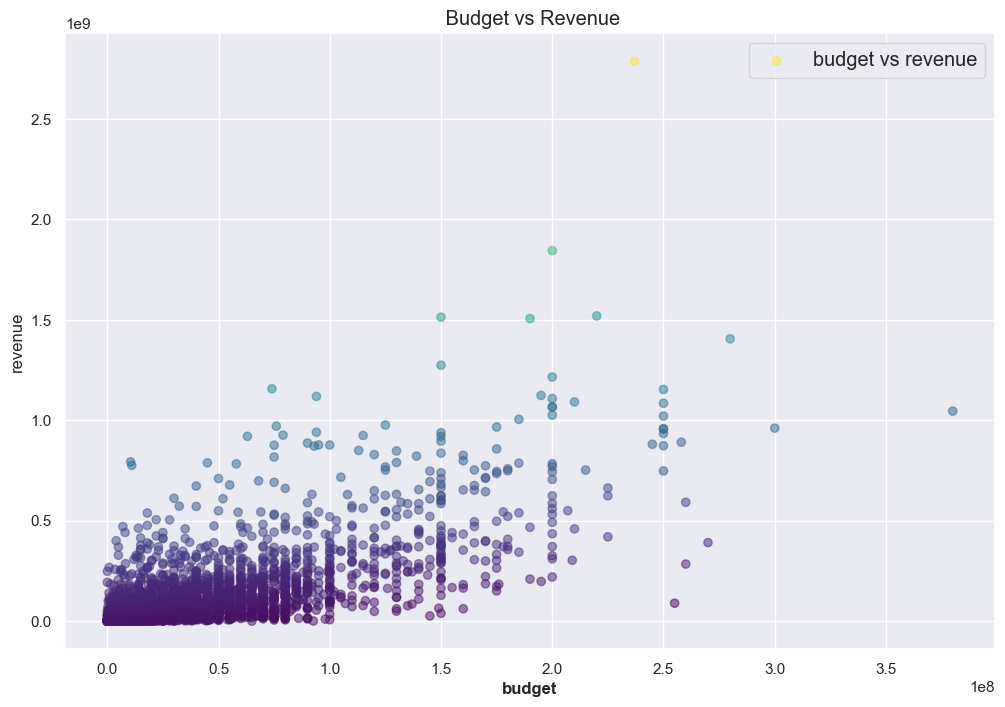

In [90]:
# Let us find if there is any relationship between budget and Revenue 

def budgetAndRevenue_relationship():
    labels = ["budget vs revenue"]
    plt.figure(figsize=(12, 8))
    plt.scatter(df.budget,
                df.revenue,
                alpha = 0.5,
                c = df["profit"],
                cmap = "viridis")
    plt.xlabel("budget", weight="bold")
    plt.ylabel("revenue")
    plt.title(" Budget vs Revenue", fontsize = "large")
    plt.legend(labels = labels, fontsize= "large")
budgetAndRevenue_relationship()

##### Observing the data points there is no relationship between budget and profits.

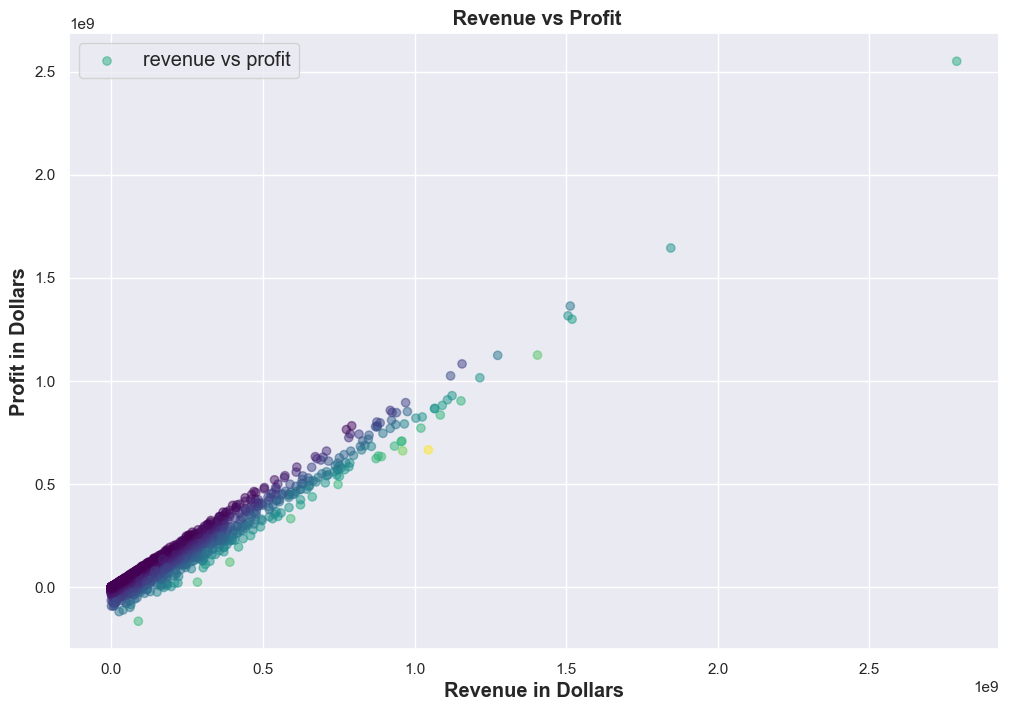

In [91]:
# Let also find if there is any relationship between budget and profit 
def budgetAndProfit_relationship():
    labels = ["revenue vs profit"]
    plt.figure(figsize=(12, 8))
    plt.scatter(df.revenue,
                df.profit,
                alpha = 0.5,
                c = df["budget"],
                cmap = "viridis")
    plt.xlabel('Revenue in Dollars', fontsize="large", weight="bold")
    plt.ylabel('Profit in Dollars', fontsize = "large", weight= "bold")
    plt.title(" Revenue vs Profit", fontsize = "large", weight="bold")
    plt.legend(labels = labels, fontsize= "large")
budgetAndProfit_relationship()

###### Inspecting the scatter we can see the relationship between profit and revenue is strong Positive relationship, thus the higher  higher the revenue is the higher profit the movie will make.

##### Which year has the highest release of movies?

In [92]:
# to answer this question let's create a new column for the release by extracting the release date

df['year'] = df['release_date'].dt.year
df['year']

0       2009
1       2007
2       2015
3       2012
4       2012
        ... 
4798    1992
4799    2011
4800    2013
4801    2012
4802    2005
Name: year, Length: 4803, dtype: int64

In [93]:
# let's count how many movies are released each year by grouping them by year
count_movies=df.groupby('year').count()['id']
count_movies.head()

year
1916    1
1925    1
1927    1
1929    2
1930    1
Name: id, dtype: int64

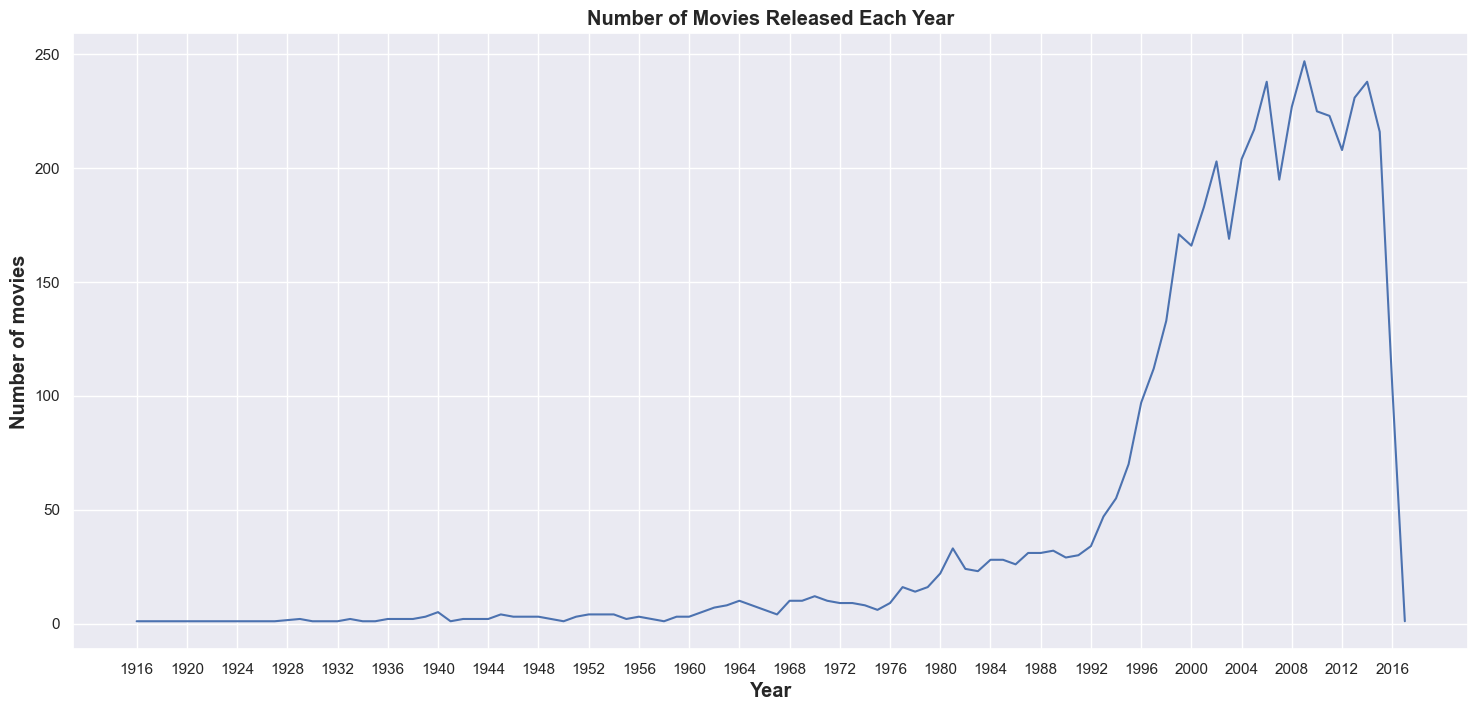

In [94]:
# create a line chart 
plt.figure(figsize=(18, 8))
count_movies.plot(xticks = np.arange(1916,2017,4))
plt.xlabel("Year", fontsize = "large", weight= "bold")
plt.ylabel("Number of movies", fontsize = "large", weight= "bold")
plt.title("Number of Movies Released Each Year", fontsize = "large", weight= "bold")
plt.savefig('movie_year.png')
plt.show()

AttributeError: 'FacetGrid' object has no attribute 'containers'

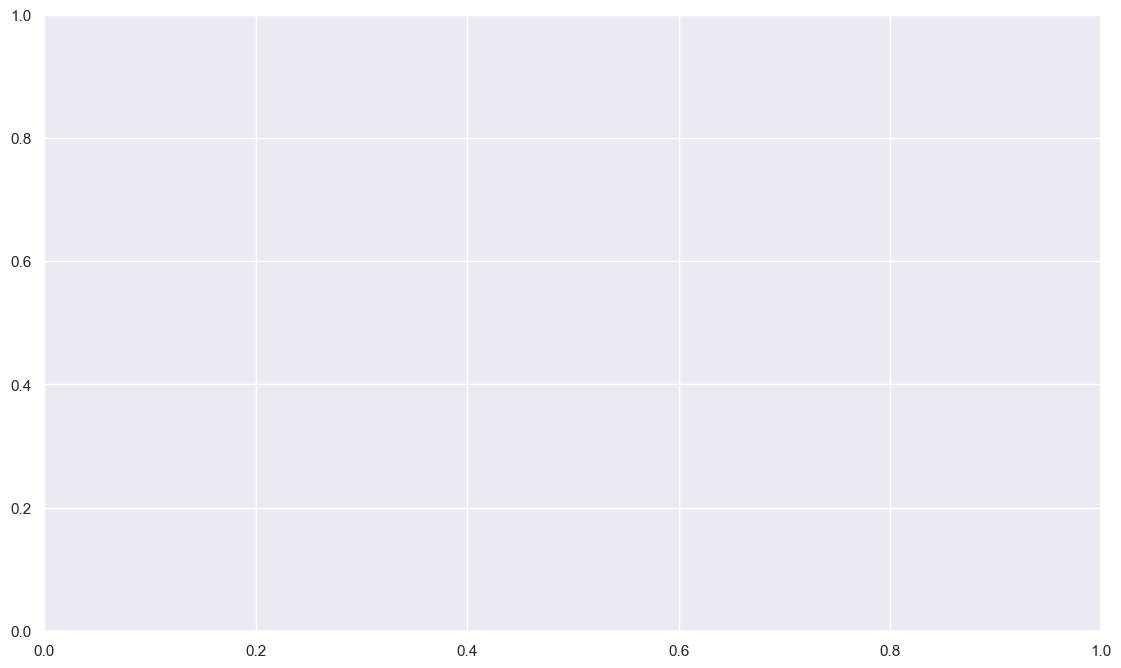

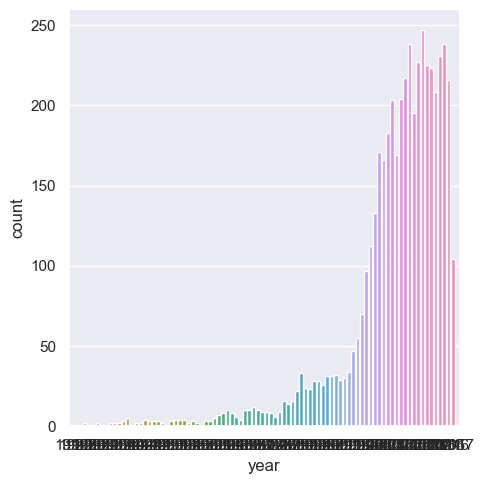

In [114]:
plt.figure(figsize = [30, 8])
plt.subplot(1, 2, 1)
ax = sns.catplot(data = df, x="year", kind="count")

for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('User Type')
plt.ylabel('Number of users');

In [95]:
count_movies.tail(10)

year
2008    227
2009    247
2010    225
2011    223
2012    208
2013    231
2014    238
2015    216
2016    104
2017      1
Name: id, dtype: int64

Inspecting the plot and the tail function result, we see that year 2009 year has the highest release of movies with 247 movies released.

##### In  which month  has the  highest Number of released movies?

In [96]:
# extract a new column for the month the movies are released.
df["released_month"] = df['release_date'].dt.month_name()

In [97]:
df.columns

Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'title', 'vote_average', 'vote_count',
       'profit', 'year', 'released_month'],
      dtype='object')

In [98]:
# Count movies by month
count_movies_per_month = df.groupby('released_month').count()["id"]
count_movies_per_month

released_month
April        350
August       413
December     456
February     326
January      383
July         363
June         389
March        372
May          363
November     326
October      474
September    588
Name: id, dtype: int64

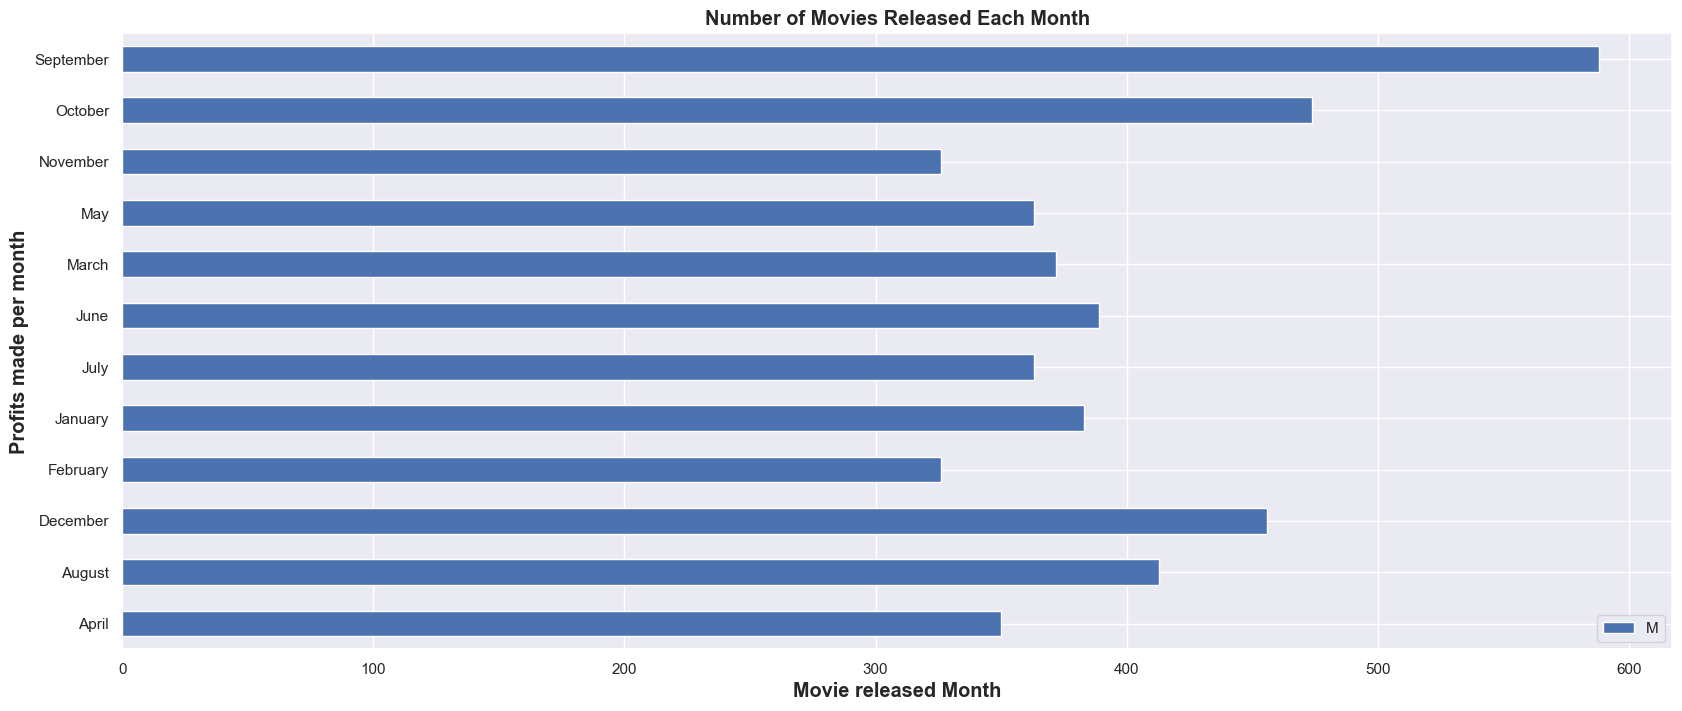

In [99]:
# plot the number of movies released per month
labels = "Movies"
plt.figure(figsize=(20, 8))
count_movies_per_month.plot(kind='barh')
plt.xlabel("Movie released Month", fontsize = "large", weight= "bold")
plt.ylabel("Profits made per month", fontsize = "large", weight= "bold")
plt.title("Number of Movies Released Each Month", fontsize = "large", weight= "bold")
plt.legend(labels = labels)
plt.show()

###### As we can obsorve from the plot, Semptemper has the highest number of release movies.

#### Which Month Made The Highest average profit?

In [100]:
df2 = df[["title", "released_month", "revenue", "profit"]]
df2.head(1)

,title,released_month,revenue,profit
0,Avatar,December,2.787965e+09,2.550965e+09


In [101]:
profit_per_month = df2.groupby("released_month")["profit"].mean()

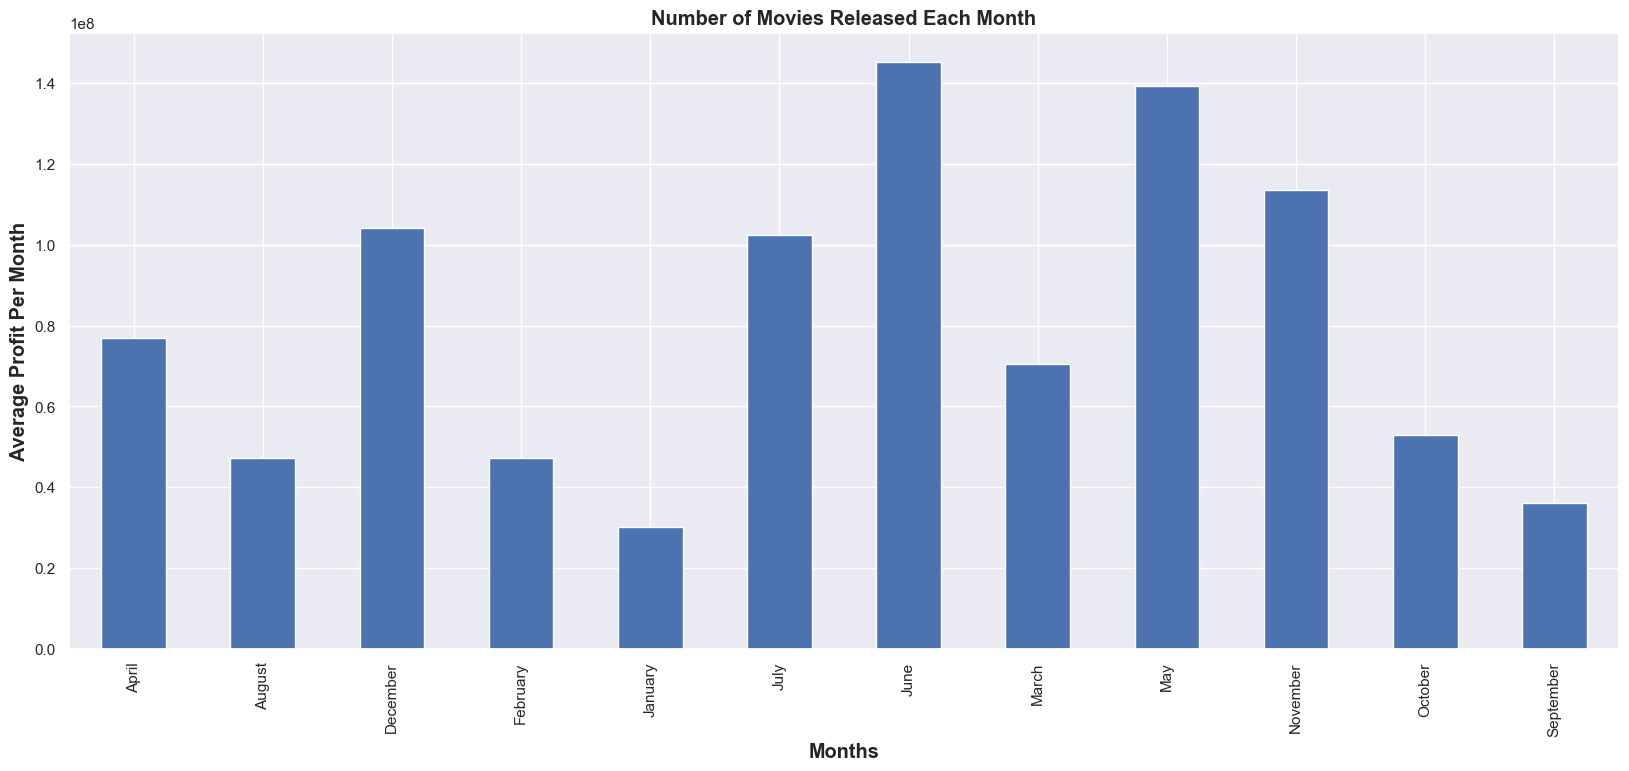

In [104]:
# plot the result
plt.figure(figsize=(20, 8))
profit_per_month.plot(kind='bar')
plt.xlabel("Months", fontsize = "large", weight= "bold")
plt.ylabel("Average Profit Per Month", fontsize = "large", weight= "bold")
plt.title("Number of Movies Released Each Month", fontsize = "large", weight= "bold")
plt.savefig('movie_per_month.png')
plt.show()

###### Insights
Movies released on July made the highest profits, followed by Jun, May, thus we can say that those months are the best time to release movies.

<a id='conclusions'></a>
## Conclusions

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

The objective of this project was to practice and put to work for the lesson's we have learned first two weeks of the Udacity Data Analyst Nono degree.

The main goal for the project was to explore the TMDB 5000 Movie dataset, drive insights and answer the questions we posted in the description section and communicate our finds.


upon exploring the data we have answered the posted questions and make recommendations as follows.

#### Q1: Which movies have the highest budget spend on?

    Top Highest budget movies: 
    . Pirates of the Caribbean: On Stranger Tides,
    . At world's end
    . Avengers: Age of Utron
    . Superman returns
    . John Carter 
##### Q2: What are the top 5 highest profit making movies and the 5 lowest movies?
    Highest Profit:
        . Avatar
        . titanic
        . Jurassic World Movie Title
        . furious 7, and The Avengers made the highest profits.

    Lowest Profit:
      . Lone Ranger made the least profit, followed by: The Alamo, 
      . Mars needs Moms, 
      . the 13th warrior, and  
      The adventures of pluto Nash.


#### Q3: What is the relationships between, [Budget & Revenue], and [profit and revenue]?
    We found there is no relationship between budget and revenue, but but the relation between
    profit and revenue is defined as a strong relationship the higher the revenue is the more profit the movie will make.
    
    
#### Q4: Which year has the highest release of movies?
    . 2009 has the highest released movies with 247 movies.
    
#### Q5: Which Month has the highest release movies?
    . September

#### Q6: Which months made the highest average profits?
    . Movies released on July made the highest profits, followed by Jun, May. So practically movies
      released during summer makes the most profits, so our recommendationt to release movies to during this months
      to make the most profits.
      
      
      
### Limitation:

the data is analyzed at best, but there are some limitation due to number of misssing values we have, there for this analysis is not 100 % guarenteed to be proof error solution. In the data wrangling section we have made some changes and filled all the 0 values with Nans assuming that this data was not recorded which effects our calculation. I wondered what our data analysis would have look like if we didn't the high number of 0 value in the Budget and revenue colunms or if I had filled the 0 values with their mean. would it have been more accurate. Those were some limitation I have encountered.

Sources used.

Pandas doc Website /Stackoverflow, Prevous lessons from the course.

https://stackoverflow.com/questions/30787901/how-to-get-a-value-from-a-pandas-dataframe-and-not-the-index-and-object-type
https://datascienceparichay.com/article/pandas-extract-year-from-datetime-column/
https://datascientyst.com/extract-month-and-year-datetime-column-in-pandas/


In [103]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr

[NbConvertApp] WARNING | pattern 'Investigate_a_Dataset.ipynb' matched no files


255